# Figure 5 a, b

In [1]:
library(RColorBrewer)
library(ggpubr)
library(RColorBrewer)
library(ggplot2)
library(ggpubr)
library(data.table)

Loading required package: ggplot2



In [2]:
load("/public/hubCache/workshop/sunhy/projects/song_project/project5/Fig5/MSI/msi_risk.rdata")
load("/public/hubCache/workshop/sunhy/projects/song_project/project5/Fig2/Model_lasso_cox_数据下载/模型构建/芯片建模_TCGA验证/OKModel_risk.rdata")


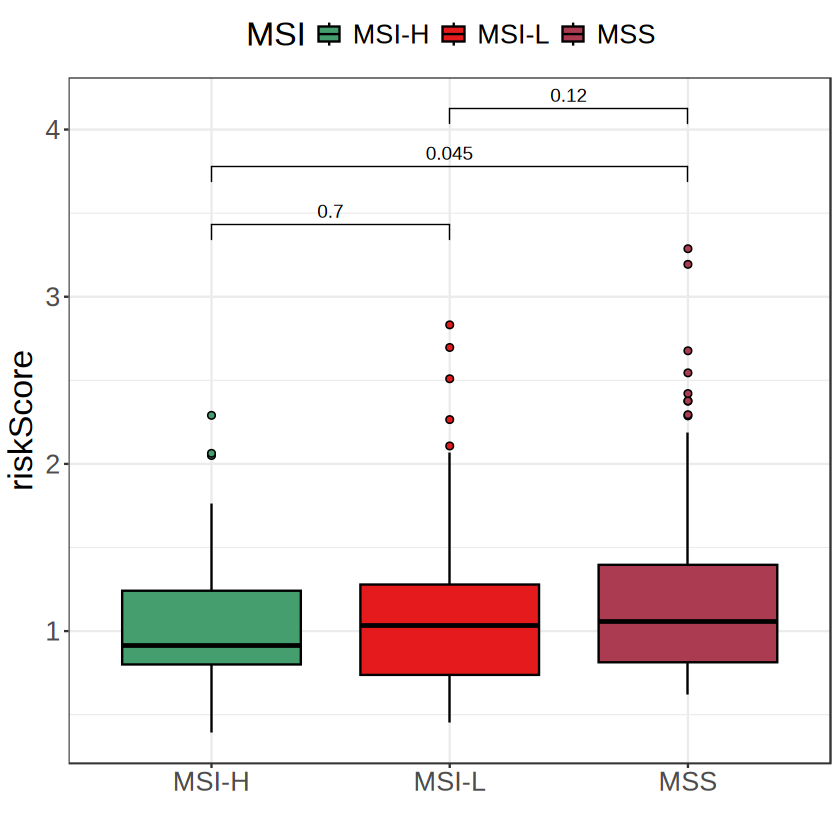

In [3]:
x = as.data.frame(msi_risk[order(msi_risk$riskScore,decreasing = F),])
x = x[-(grep("MSS",head(x,50)[,2])),]

mypalette <- colorRampPalette(brewer.pal(8,"Set1"))
my_comparisons <- list( c("MSI-H", "MSI-L"), c("MSI-H", "MSS"), c("MSI-L", "MSS") ) 
g1 = ggplot(x,aes(MSI,riskScore,fill = MSI)) + 
  geom_boxplot(outlier.shape = 21,color = "black") + 
  theme_bw() + 
  labs(x = "", y = "riskScore") +
  theme(legend.position = "top") + 
  scale_fill_manual(values = mypalette(22)[c(6,1,2)])+ 
  stat_compare_means(comparisons = my_comparisons)+   # Add global p-value
theme(text = element_text(size = 20))
g1
ggsave("MSI_3.pdf",g1,width = 5,height =5)


Attaching package: ‘survminer’


The following object is masked from ‘package:survival’:

    myeloma


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.
ℹ The deprecated feature was likely used in the ggpubr package.
  Please report the issue at <https://github.com/kassambara/ggpubr/issues>.”
Warning message in geom_segment(aes(x = 0, y = max(y2), xend = max(x1), yend = max(y2)), :
“All aesthetics have length 1, but the data has 2 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”
Ignoring unknown labels:
• fill : ""
• linetype : "1"
Warning message in geom_segment(aes(x = 0, y = max(y2), xend = max(x1), yend = max(y2)), :
“All aesthetics have length 1, but the data has 2 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”
Ignoring unknown labels:
• fill : ""
• linetype : "1"
Warning message in geom_segment(aes(x = 

agg_record_1272036843 
                    2

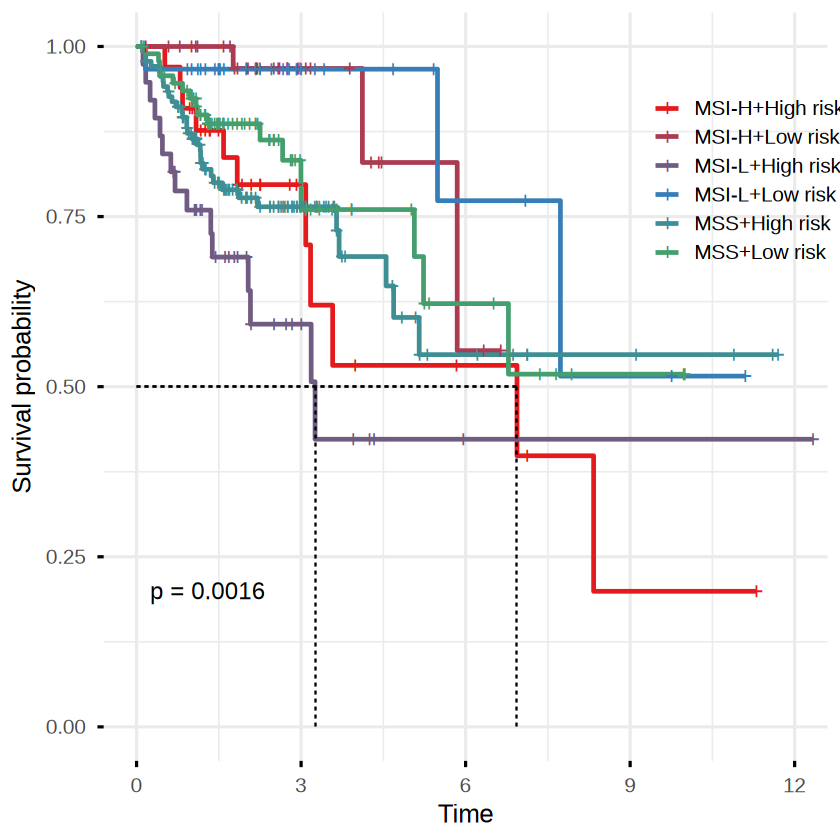

In [4]:
TCGA_risk_ = TCGA_risk[,1:10]
TCGA_risk_$ID = substr(TCGA_risk_$ID,1,15)
x__ = merge(x,TCGA_risk_,by.x = "ID",by.y ="ID")
x__$MSI_risk = ifelse(x__$MSI == "MSS" & x__$risk == "high","MSS+High risk",
                     ifelse(x__$MSI == "MSS" & x__$risk == "low","MSS+Low risk",
                           ifelse(x__$MSI == "MSI-H" & x__$risk == "low","MSI-H+Low risk",
                                 ifelse(x__$MSI == "MSI-H"& x__$risk == "high","MSI-H+High risk",
                                       ifelse(x__$MSI == "MSI-L"& x__$risk == "high","MSI-L+High risk","MSI-L+Low risk")))))
library(survival)
library(survminer)
fit <- survfit(Surv(OS_time, Status) ~x__[,"MSI_risk"] , data = x__)
g2 = ggsurvplot(fit,
          pval = TRUE, #conf.int = TRUE,
          #risk.table = TRUE, # 添加风险表
          risk.table.col = "strata", # 根据分层更改风险表颜色
          #linetype = "strata", # 根据分层更改线型
          surv.median.line = "hv", # 同时显示垂直和水平参考线
          #ggtheme = theme_bw(), # 更改ggplot2的主题
          palette =mypalette(22)[c(1:6)],
               legend = c(0.9,0.8),
               legend.title = "",
          legend.labs = names(table(x__[,paste0("MSI_risk")])),ggtheme = theme_minimal(base_size = 15))
g2
pdf("MSI_KM.pdf",width = 5,height = 5)
g2
dev.off()


# figure 5 c, d

In [5]:
library(tidyverse)
library(maftools)
library(ggpubr)
library(RColorBrewer)
library(data.table)
library(survival)
library(survminer)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.4     ✔ tibble    3.3.0
✔ purrr     1.1.0     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()     masks data.table::between()
✖ dplyr::filter()      masks stats::filter()
✖ dplyr::first()       masks data.table::first()
✖ lubridate::hour()    masks data.table::hour()
✖ lubridate::isoweek() masks data.table::isoweek()
✖ dplyr::lag()         masks stats::lag()
✖ dplyr::last()        masks data.table::last()
✖ lubridate::mday()    masks data.table::mday()
✖ lubridate::minute()  masks data.table::minute()
✖ lubridate::month()   masks data.table::month()
✖ lubridate::quarter() masks data.table::quarter()
✖ lubridate::second()  masks data.table::second()
✖ purrr::transpose()   masks data.table::transpose()
✖ lubridate::wday()    masks data.table::wd

In [6]:
load("/public/hubCache/workshop/sunhy/projects/song_project/project5/Fig5/TMB/TMB_coad.rdata")
load("/public/hubCache/workshop/sunhy/projects/song_project/project5/Fig2/Model_lasso_cox_数据下载/模型构建/芯片建模_TCGA验证/OKModel_risk.rdata")


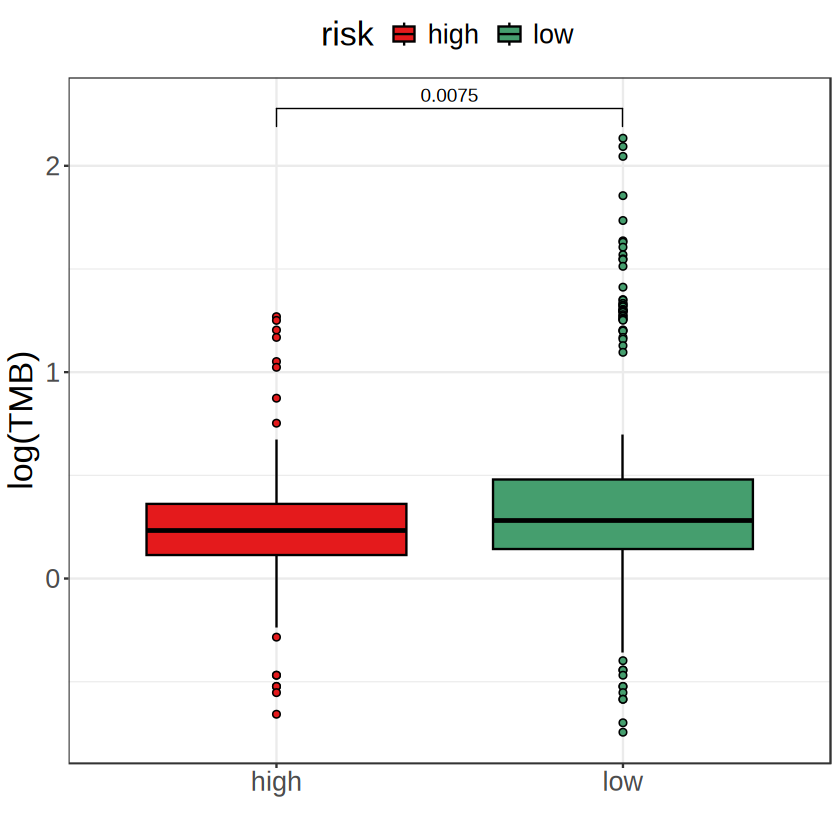

In [7]:
mypalette <- colorRampPalette(brewer.pal(8,"Set1"))
my_comparisons = list(c("high","low"))

g3 = ggplot(x,aes(risk,TMBlog,fill = risk)) + 
  geom_boxplot(outlier.shape = 21,color = "black") + 
  theme_bw() + 
  labs(x = "", y = "log(TMB)") +
  theme(legend.position = "top") + 
  scale_fill_manual(values = mypalette(22)[c(1,6)])+ 
    stat_compare_means(comparisons = my_comparisons)+# 调整其他文本的字体大小
  theme( text = element_text(size = 20))
#stat_compare_means(aes(group = risk,label = ..p.signif..),method = "wilcox.test",label.x = 1.5,na.rm = T,)
ggsave("TBM_TCGA.pdf",g3,width = 5,height =5)
g3



Warning message in geom_segment(aes(x = 0, y = max(y2), xend = max(x1), yend = max(y2)), :
“All aesthetics have length 1, but the data has 2 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”
Ignoring unknown labels:
• fill : ""
• linetype : "1"
Warning message in geom_segment(aes(x = 0, y = max(y2), xend = max(x1), yend = max(y2)), :
“All aesthetics have length 1, but the data has 2 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”
Ignoring unknown labels:
• fill : ""
• linetype : "1"
Warning message in geom_segment(aes(x = 0, y = max(y2), xend = max(x1), yend = max(y2)), :
“All aesthetics have length 1, but the data has 2 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”
Ignoring unknown labels:
• fill : ""
• linetype : "1"
Warning message in geom_segment(aes(x = 0, y = max(y2), xend = max(x1), yend = max(y2)), :
“All aesthetics

agg_record_1865833851 
                    2

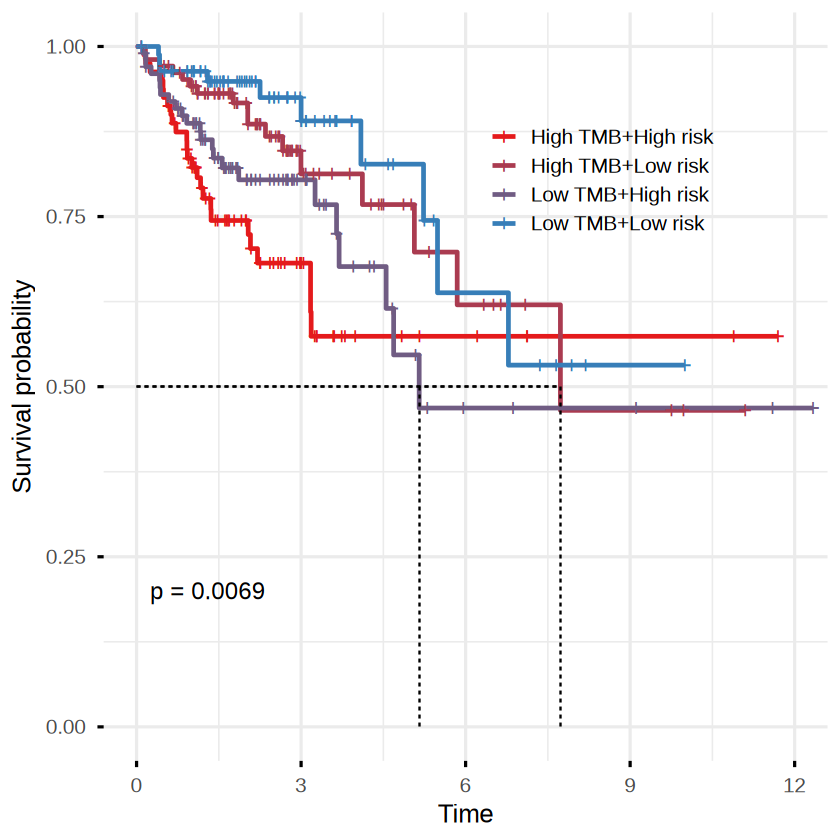

In [8]:
library(survival)
library(survminer)
TCGA_risk_ = TCGA_risk[,1:10]
x__ = merge(x,TCGA_risk_,by.x = "ID",by.y ="ID_")
x__$TMB_group_risk = ifelse(x__$TMBlog > median(x__$TMBlog)&x__$risk == "high","High TMB+High risk",
                            ifelse(x__$TMBlog > median(x__$TMBlog)&x__$risk == "low","High TMB+Low risk",
                                  ifelse(x__$TMBlog < median(x__$TMBlog)&x__$risk == "low","Low TMB+Low risk","Low TMB+High risk")))
x___ = x__[x__$OS_time<5,]
fit <- survfit(Surv(OS_time, Status) ~x__[,"TMB_group_risk"] , data = x__)
g4 = ggsurvplot(fit,
          pval = TRUE, #conf.int = TRUE,
          #risk.table = TRUE, # 添加风险表
          risk.table.col = "strata", # 根据分层更改风险表颜色
          #linetype = "strata", # 根据分层更改线型
          surv.median.line = "hv", # 同时显示垂直和水平参考线
          #ggtheme = theme_bw(), # 更改ggplot2的主题
          palette =mypalette(22)[c(1:4)],
               legend = c(0.7,0.8),
               legend.title = "",
          legend.labs = names(table(x__[,paste0("TMB_group_risk")])),ggtheme = theme_minimal(base_size = 15))
g4
pdf("TMB_KM.pdf",width = 5,height = 5)
g4
dev.off()
save(tmb,risk_tmb,x,km_tmb,file = "TMB_coad.rdata")

# Figure 5 e-h

In [9]:
library(clusterProfiler)
library(msigdbr)
library(GSVA) 
library(GSEABase)
library(pheatmap)
library(limma)
library(BiocParallel)
library(estimate)
library(tidyverse)
library(ggpubr)

Warning message:
“multiple methods tables found for ‘union’”
Warning message:
“multiple methods tables found for ‘intersect’”
Warning message:
“multiple methods tables found for ‘setdiff’”
Warning message:
“multiple methods tables found for ‘setequal’”
Warning message:
“replacing previous import ‘BiocGenerics::setequal’ by ‘S4Vectors::setequal’ when loading ‘AnnotationDbi’”
Warning message:
“replacing previous import ‘BiocGenerics::setequal’ by ‘S4Vectors::setequal’ when loading ‘IRanges’”
Warning message:
“multiple methods tables found for ‘union’”
Warning message:
“multiple methods tables found for ‘intersect’”
Warning message:
“multiple methods tables found for ‘setdiff’”
Warning message:
“replacing previous import ‘BiocGenerics::setequal’ by ‘S4Vectors::setequal’ when loading ‘Biostrings’”
Warning message:
“replacing previous import ‘BiocGenerics::setequal’ by ‘S4Vectors::setequal’ when loading ‘XVector’”
Warning message:
“replacing previous import ‘BiocGenerics::setequal’ by ‘S4Ve

In [10]:
load("/public/hubCache/workshop/sunhy/projects/song_project/project5/Fig2/Model_lasso_cox_数据下载/模型构建/芯片建模_TCGA验证/OKModel_risk.rdata")


In [11]:
group_list = data.frame(group = entire_risk$risk,row.names = rownames(entire_risk))

In [12]:
gsva_mat = read.csv("/public/hubCache/workshop/sunhy/projects/song_project/project5/Fig5/GSVA/gsva_go_matrix.csv",header = T, row.names = 1)
exp="high"
ctr="low"
design <- model.matrix(~0+factor(group_list$group))
colnames(design) <- levels(factor(group_list$group))
rownames(design) <- colnames(gsva_mat)
contrast.matrix <- makeContrasts(contrasts=paste0(exp,'-',ctr),  #"exp/ctrl"
                                 levels = design)

fit1 <- lmFit(gsva_mat,design)                 
fit2 <- contrasts.fit(fit1, contrast.matrix) 
efit <- eBayes(fit2)                         
summary(decideTests(efit,lfc=0, p.value=0.05)) 
tempOutput <- topTable(efit, coef=paste0(exp,'-',ctr), n=Inf)
degs <- na.omit(tempOutput)

# write.csv(degs,"gsva_DDR_degs.results.csv")
degs =  read.csv("/public/hubCache/workshop/sunhy/projects/song_project/project5/Fig5/GSVA/gsva_go_degs.results.csv", header = T, row.names = 1)
UP = rownames(degs[order(degs$logFC,decreasing = T),])[1:10];DOWN = rownames(degs[order(degs$logFC,decreasing = F),])[1:10]
keep = c(UP,DOWN)
padj_cutoff=0.05
log2FC_cutoff=log2(1)
keep <- rownames(degs[degs$adj.P.Val < padj_cutoff & abs(degs$logFC)>log2FC_cutoff, ])
length(keep)
keep = c(UP,DOWN)
dat <- gsva_mat[keep,]



dat = dat[,order(group_list$group)]
annotation_row = data.frame(row.names = rownames(dat),anno = substr(rownames(dat),1,30))
annotation_row$... = "..."
annotation_row$anno = str_c(annotation_row$anno ,annotation_row$...)
annotation_row$anno = gsub("_"," ",annotation_row$anno)
groupcolor = c("#9d4351","#6d5d80");names(groupcolor) = c("high","low")
ann_colors = list(group = groupcolor)


pheatmap::pheatmap(dat, 
                   fontsize_row = 8,
                   cluster_rows = F,
                   cluster_cols = F,
                   height = 5,
                   width=7,
                   scale = "row",
                   annotation_col = group_list,
                   annotation_colors = ann_colors,
                   show_colnames = F,
                   show_rownames = T,
                   labels_row  = annotation_row$anno,
                   color=colorRampPalette(c("navy","white","firebrick3"))(100),
                   filename = paste0('GSVA_go_heatmap.pdf')
                  )		 

       high-low
Down       2069
NotSig     3606
Up         4716

[1] 6785

In [13]:
gsva_mat = read.csv("/public/hubCache/workshop/sunhy/projects/song_project/project5/Fig5/GSVA/gsva_kegg_matrix.csv",header = T, row.names = 1)
exp="high"
ctr="low"
design <- model.matrix(~0+factor(group_list$group))
colnames(design) <- levels(factor(group_list$group))
rownames(design) <- colnames(gsva_mat)
contrast.matrix <- makeContrasts(contrasts=paste0(exp,'-',ctr),  #"exp/ctrl"
                                 levels = design)

fit1 <- lmFit(gsva_mat,design)                 
fit2 <- contrasts.fit(fit1, contrast.matrix) 
efit <- eBayes(fit2)                         
summary(decideTests(efit,lfc=0, p.value=0.05)) 
tempOutput <- topTable(efit, coef=paste0(exp,'-',ctr), n=Inf)
degs <- na.omit(tempOutput)

degs =  read.csv("/public/hubCache/workshop/sunhy/projects/song_project/project5/Fig5/GSVA/gsva_kegg_degs.results.csv", header = T, row.names = 1)
UP = rownames(degs[order(degs$logFC,decreasing = T),])[1:10];DOWN = rownames(degs[order(degs$logFC,decreasing = F),])[1:10]
keep = c(UP,DOWN)
padj_cutoff=0.05
log2FC_cutoff=log2(1)
keep <- rownames(degs[degs$adj.P.Val < padj_cutoff & abs(degs$logFC)>log2FC_cutoff, ])
length(keep)
keep = c(UP,DOWN)
dat <- gsva_mat[keep,]

dat = dat[,order(group_list$group)]
annotation_row = data.frame(row.names = rownames(dat),anno = substr(rownames(dat),1,30))
annotation_row$... = "..."
annotation_row$anno = str_c(annotation_row$anno ,annotation_row$...)
annotation_row$anno = gsub("_"," ",annotation_row$anno)
groupcolor = c("#9d4351","#6d5d80");names(groupcolor) = c("high","low")
ann_colors = list(group = groupcolor)

pheatmap::pheatmap(dat, 
                   fontsize_row = 8,
                   cluster_rows = F,
                   cluster_cols = F,
                   height = 5,
                   width=7,
                   scale = "row",
                   annotation_col = group_list,
                   annotation_colors = ann_colors,
                   show_colnames = F,
                   show_rownames = T,
                   labels_row  = annotation_row$anno,
                   color=colorRampPalette(c("navy","white","firebrick3"))(100),
                   filename = paste0('GSVA_kegg_heatmap.pdf')
                  )				 

       high-low
Down         68
NotSig       57
Up           61

[1] 129

Warning message:
“The `guide` argument in `scale_*()` cannot be `FALSE`. This was deprecated in
ggplot2 3.3.4.
ℹ Please use "none" instead.
ℹ The deprecated feature was likely used in the ggpubr package.
  Please report the issue at <https://github.com/kassambara/ggpubr/issues>.”


agg_record_644799525 
                   2

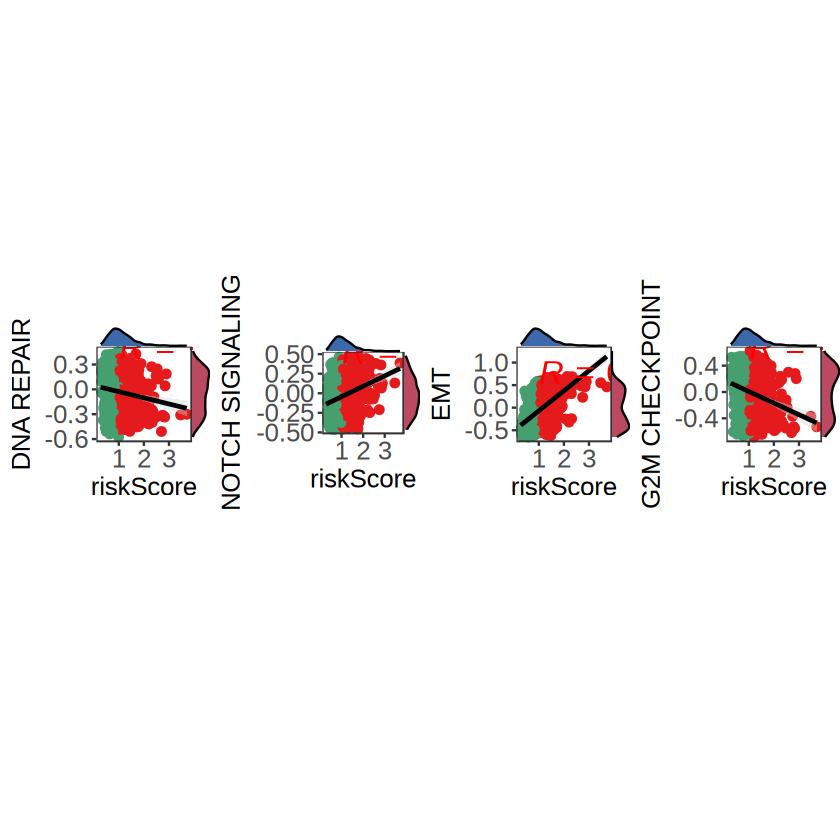

In [14]:
library(ggExtra)
theme_global <- theme_bw()+theme(panel.grid.major = element_blank(),panel.grid.minor=element_blank()) + theme(aspect.ratio = 1)+  theme(
    text = element_text(size = 15),  
    axis.text = element_text(size = 15),  
    axis.title = element_text(size = 15),  
    legend.title = element_text(size = 14),  
    legend.text = element_text(size = 12)  
  )
risk_colors <- c("low" = "#469f6f", "high" = "#e41a1c") 
data = read.csv("/public/hubCache/workshop/sunhy/projects/song_project/project5/Fig5/GSVA/gsva_Hallmark_matrix.csv",header = T,row.names = 1)
data = as.data.frame(t(data))
data_ = data[,c(12,35,14,18)]
data_$ID = rownames(data_)
df = data.frame(ID = rownames(entire_risk),riskScore = entire_risk[,17669],risk =entire_risk[,17670])
data__ =merge(df,data_, by = "ID")

colnames(data__)[4:7] = gsub("_"," ",substring(colnames(data__)[4:7],10))
colnames(data__)[6] = "EMT"
pp = list()
for(i in 4:ncol(data__)){
g1 = ggscatter(data__, x =colnames(data__)[2] ,y = colnames(data__)[i],
          add = "reg.line", conf.int = T,
          color = "risk",
          add.params = list(fill = "lightgray",color = "black"),
          ggtheme = theme_minimal(), margin.plot =  "density"
)+ stat_cor(method = "pearson",
           label.x = median(data__[,2]), label.y =max(data__[,i]),color='red',size =7)+theme_global+
    scale_color_manual(values =risk_colors ,guide = F)
g2 = ggMarginal(g1, type="density",xparams = list( fill="#3c69ac", size = 0.5,alpha=1), yparams = list(fill="#bb4962", size = 0.5,alpha=1))
pp[[i]] = g2
}
cor_4_hallmark = data__
# save(cor_4_hallmark,file = "cor_4_hallmark.rdata")
plot_ = pp[4:7]
pdf("cor_list.pdf",width = 20,height = 5)
cowplot::plot_grid(plotlist = plot_, align = "h", nrow = 1)
dev.off()
cowplot::plot_grid(plotlist = plot_, align = "h", nrow = 1)

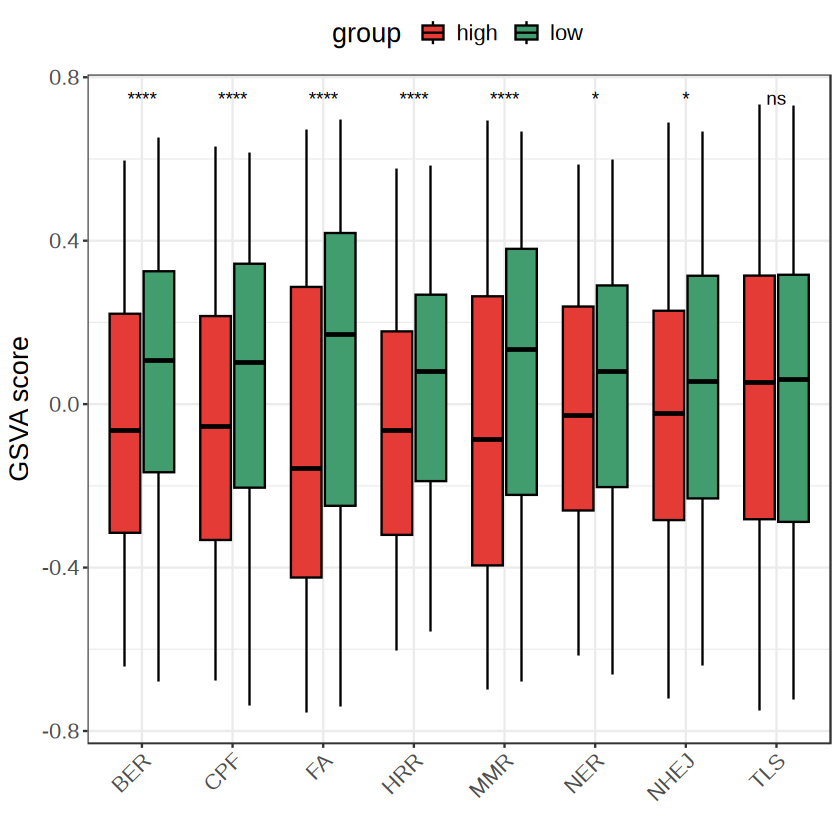

In [15]:
# -----------------------------
# 0. 加载必要的库
# -----------------------------
library(tidyr)
library(dplyr)
library(ggplot2)
library(ggpubr)

# -----------------------------
# 1. 读取 GSVA 结果矩阵
# -----------------------------
gsva_matrix <- read.csv(
  "/public/hubCache/workshop/sunhy/projects/song_project/project5/Fig5/GSVA/gsva_DDR_matrix.csv",
  row.names = 1,
  check.names = FALSE
)

# 转置矩阵并添加样本 ID 列
data <- as.data.frame(t(gsva_matrix))
data$ID <- rownames(data)

# 将行名作为 ID 列
group_list$ID <- rownames(group_list)

# 确保列名正确
colnames(group_list) <- c("group", "ID")

# -----------------------------
# 3. 合并 GSVA 数据和分组信息
# -----------------------------
data_ <- merge(data, group_list, by = "ID", all.x = TRUE)

# 检查是否有未匹配样本
if (sum(is.na(data_$group)) > 0) {
  warning("存在未匹配的样本，请检查样本 ID")
}

# -----------------------------
# 4. 转成长格式，保留 DDR 8 条通路
# -----------------------------
data_long <- data_ %>%
  pivot_longer(
    cols = c("BER","CPF","FA","HRR","MMR","NER","NHEJ","TLS"),
    names_to = "Pathway",
    values_to = "GSVA_score"
  )

# -----------------------------
# 5. 绘制 DDR GSVA 箱线图
# -----------------------------
mycolors <- c("low" = "#419D6E", "high" = "#E53B36")

DDR <- ggplot(data_long, aes(x = Pathway, y = GSVA_score, fill = group)) +
  geom_boxplot(outlier.shape = 21, color = "black") +
  scale_fill_manual(values = mycolors) +
  stat_compare_means(aes(group = group, label = ..p.signif..), method = "wilcox.test") +
  theme_bw() +
  labs(x = "", y = "GSVA score") +
  theme(
    legend.position = "top",
    text = element_text(size = 16),
    axis.text.x = element_text(angle = 45, hjust = 1)
  )

# 显示绘图
print(DDR)

# 保存为 PDF
ggsave("DDR_GSVA_boxplot.pdf", DDR, width = 8, height = 6)
